## ANALYZING COVID-19 

## 1. Introduction
COVID-19, also known as the coronavirus disease, is a global pandemic that has affected the lives of millions of people around the world. It is caused by the SARS-CoV-2 virus, which is a highly contagious respiratory illness that can lead to severe illness or death.In this project, you can use Jupyter notebooks to analyze COVID-19 data, visualize trends and patterns, and build models to predict the spread of the virus. Some possible topics you could explore include:

- Understanding the transmission and spread of COVID-19
- Analyzing the impact of vaccines on transmission and spread of Covid-19
- Examining the relationship between COVID-19 and other factors, such as population density, economic conditions, and healthcare infrastructure

The data  for this project is obtained from  our world in data at :https://ourworldindata.org/policy-responses-covid

## 2. Importing python libraries  and  setting up  the notebook 
We will begin by importing the necessary libraries t. The analysis will mainly use pandas libraries with matplotlib,  seaborn  and  plotly for visualization.

In [26]:
#dataframe manipulation
import pandas as pd

#numerical calculations
import numpy as np

#basic visualization
import matplotlib.pyplot as plt

#advanced manipulation
import seaborn as sns

#interactive manipulation
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots



#directory changes
import os

In [27]:
#offline plotting

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [28]:
# converter
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [29]:
# color pallette
cnf, dth, rec, act = '#393e46', '#ff2e63', '#21bf73', '#fe9801' 

# seaborn plot style
# sns.set_style('darkgrid')

## 3.  Loading, cleaning and transforming the data

We will then proceed to load our csv file.The next step will be undertanding our dataset. This will include checking the shape (number of rows and columns), data types, missing values and any incosistencies . Where necessary, we will carry out some transformation to change the variable to the required form.

In [30]:
#changing our directory
os.chdir('C:/Users/ELITEBOOK COI5/Desktop/Michael Work/Coding & Programming/Public Data/covid -19')

#loading our data
covid_data=pd.read_csv('owid-covid-data.csv')

#confirming our data is loaded
covid_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [31]:
#Checking our column names
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

From above we have sixty seven columns within our data. However, our analysis will  require all these, so we will proceed to make a list of only the fields we need

In [32]:
relevant_columns=[ 'iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
        'total_deaths', 'new_deaths',
        'total_cases_per_million',
       'new_cases_per_million', 
       'total_deaths_per_million', 'new_deaths_per_million',
        'reproduction_rate', 
        'hosp_patients',  'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',  'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population_density', 'median_age', 
       'gdp_per_capita', 'extreme_poverty', 
       'life_expectancy', 'human_development_index', 'population',
      ]

print(len(relevant_columns))

38


In [33]:
#We will create a new dataframe with the required relevant columns
covid_data_rel=covid_data[relevant_columns]

#Check the shape of our new dataframe
covid_data_rel.shape

(244842, 38)

Now we have the data with relevant fields that we require we can proceed  with the cleaning process. We see that our data frame contains 38 fields with 244,842 records

In [34]:
# Reviewing the details of our fields
covid_data_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244842 entries, 0 to 244841
Data columns (total 38 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    244842 non-null  object 
 1   continent                                   231077 non-null  object 
 2   location                                    244842 non-null  object 
 3   date                                        244842 non-null  object 
 4   total_cases                                 230781 non-null  float64
 5   new_cases                                   230493 non-null  float64
 6   total_deaths                                211340 non-null  float64
 7   new_deaths                                  211261 non-null  float64
 8   total_cases_per_million                     229730 non-null  float64
 9   new_cases_per_million                       229442 non-null  float64
 

From the above we will have to deal with most fields having missing values as many were not as consistent in terms of reporting. For our analysis we will have to deal the data as it is . However  we will need to carry at a few changes:
- change  the date from object datatype to datetime type
- extract month and year from  datetime
- change location field to country field
- if you scroll through the data field you will notice that continent data is also tracked within country data. We will have to eliminate this

In [113]:
covid_data_rel['continent']=covid_data_rel['continent'].astype(str)

In [114]:
continents=covid_data_rel['continent'].unique()
continents

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [36]:
#We need to convert  the date  column from object  to date
covid_data_rel['date']=pd.to_datetime(covid_data_rel['date'])

In [37]:
#Extracting  month and year from date
covid_data_rel['Year'] = covid_data_rel['date'].dt.year
covid_data_rel['Month'] = covid_data_rel['date'].dt.month_name()

In [38]:
#Renaming location to country
covid_data_rel.rename(columns={'location':'country'}, inplace=True)

In [39]:
#identifying other names that are not countries
others=covid_data[covid_data['continent'].isna()]['location'].unique()
print(others)

['Africa' 'Asia' 'Europe' 'European Union' 'High income' 'International'
 'Low income' 'Lower middle income' 'North America' 'Oceania'
 'South America' 'Upper middle income' 'World']


In [40]:
# Removing from the country field
covid_data_rel=covid_data_rel[~covid_data_rel['country'].isin(others)]

In [115]:
#checking our new dataframes
covid_data_rel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231077 entries, 0 to 244841
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    231077 non-null  object        
 1   continent                                   231077 non-null  object        
 2   country                                     231077 non-null  object        
 3   date                                        231077 non-null  datetime64[ns]
 4   total_cases                                 217023 non-null  float64       
 5   new_cases                                   216728 non-null  float64       
 6   total_deaths                                197767 non-null  float64       
 7   new_deaths                                  197509 non-null  float64       
 8   total_cases_per_million                     217023 non-null  float64      

Now we have all the transformations done.We can proceed to the visualization and  analysis

## 3. Visualization and Analysis
### 3.1. Maps

In [42]:
#Define a function to create the maps

def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="country", locationmode='country names', 
                  color=col, hover_name="country", 
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

#### 3.1.1. Confirmed Cases in Each Country

In [169]:
#getting total number of cases per country
total_cases_per_country=covid_data_rel.groupby('country').agg(Total_cases=('new_cases','sum')).reset_index()
total_cases_per_country.head()


,country,Total_cases
0,Afghanistan,207270.0
1,Albania,333731.0
2,Algeria,271193.0
3,Andorra,47686.0
4,Angola,104973.0


In [44]:
total_cases_per_country.sort_values(by='Total_cases', ascending=False).head()

,country,Total_cases
221,United States,100365942.0
93,India,44679840.0
71,France,39612412.0
76,Germany,37211996.0
27,Brazil,35987899.0


In [45]:
#Creating a choropleth map for the confirmed cases
plot_map(total_cases_per_country, 'Total_cases', 'matter')

#### 3.1.2. Confirmed Cases in Each Country

In [46]:
#getting total number of cases per country
total_deaths_per_country=covid_data_rel.groupby('country').agg(Total_deaths=('new_deaths','sum')).reset_index()
total_deaths_per_country.sort_values(by='Total_deaths', ascending=False).head()


,country,Total_deaths
221,United States,1090725.0
27,Brazil,692735.0
93,India,523317.0
171,Russia,385358.0
130,Mexico,323808.0


In [47]:
#Creating a choropleth map for the confirmed deaths
plot_map(total_deaths_per_country, 'Total_deaths', 'matter')

### 3.2.  Trends

In [78]:
#Creating a function to plot daily trends using a bar plot

def plot_daywise(df,col, hue):
    fig = px.bar(df, x="date", y=col, width=1000, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

#### 3.2.1. Daily  Global Cumulative cases

In [65]:
cumulative_cases_by_day=covid_data_rel.groupby('date').agg(confirmed_cases=('total_cases','sum')).reset_index()
cumulative_cases_by_day.tail()

,date,confirmed_cases
1083,2022-12-19,653723198.0
1084,2022-12-20,654426666.0
1085,2022-12-21,655130570.0
1086,2022-12-22,655876028.0
1087,2022-12-23,656521679.0


In [79]:
#plotting the graph
plot_daywise(cumulative_cases_by_day, 'confirmed_cases', '#000000')

#### 3.2.2. Daily New cases

In [168]:
#Calculating the new cases
new_cases_by_day=covid_data_rel.groupby('date').agg(new_cases=('new_cases','sum')).reset_index()
new_cases_by_day.tail()

,date,new_cases
1083,2022-12-19,605005.0
1084,2022-12-20,703468.0
1085,2022-12-21,703904.0
1086,2022-12-22,745458.0
1087,2022-12-23,646857.0


In [80]:
#plotting the daily new cases data
plot_daywise(new_cases_by_day, 'new_cases', '#000000')


#### 3.2.3. Cumulative deaths by day

In [71]:
cumulative_deaths_by_day=covid_data_rel.groupby('date').agg(confirmed_deaths=('total_deaths','sum')).reset_index()
cumulative_deaths_by_day.tail()

,date,confirmed_deaths
1083,2022-12-19,6667557.0
1084,2022-12-20,6669677.0
1085,2022-12-21,6672093.0
1086,2022-12-22,6674741.0
1087,2022-12-23,6677246.0


In [81]:
plot_daywise(cumulative_deaths_by_day, 'confirmed_deaths', '#ff0000')

#### 3.2.4. Daily new deaths

In [74]:
new_deaths_by_day=covid_data_rel.groupby('date').agg(new_deaths=('new_deaths','sum')).reset_index()
new_deaths_by_day.tail()

,date,new_deaths
1083,2022-12-19,1703.0
1084,2022-12-20,2120.0
1085,2022-12-21,2416.0
1086,2022-12-22,2648.0
1087,2022-12-23,2505.0


In [82]:
plot_daywise(new_deaths_by_day, 'new_deaths', '#ff0000')

#### 3.2.5.  Continental Cases 

In [116]:
continents=covid_data_rel['continent'].unique()

In [142]:
#Defining functions
def regional_cumulative_cases(continent_name):
    cumulative_cases=covid_data_rel[covid_data_rel['continent']==continent_name].groupby('date').agg(total_cases=('total_cases', 'sum')).reset_index()
    return cumulative_cases


#Defining functions
def regional_cumulative_deaths(continent_name):
    cumulative_deaths=covid_data_rel[covid_data_rel['continent']==continent_name].groupby('date').agg(total_deaths=('total_deaths', 'sum')).reset_index()
    return cumulative_deaths

In [143]:
#Getting the cases data for each region
regional_daily_cumulative_cases={}

for name in continents:
    regional_daily_cumulative_cases[name]=regional_cumulative_cases(name)
    


In [144]:
#getting the death data for each region
regional_daily_cumulative_deaths={}

for name in continents:
    regional_daily_cumulative_deaths[name]=regional_cumulative_deaths(name)
    

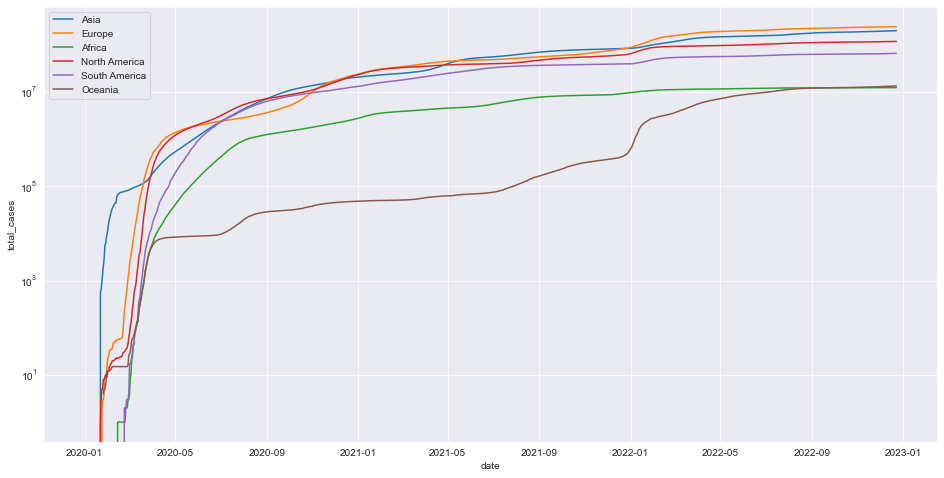

In [148]:
#Generate plot for regional cases

plt.figure(figsize=(16, 8))
for name in continents:
    sns.lineplot(data=regional_daily_cumulative_cases[name], x='date', y='total_cases', label=name)
    
plt.yscale('log')

In [159]:
#Creating stacked plot of daily cases
plot = go.Figure()

for name in continents:
    plot.add_trace(go.Scatter(
    name = name,
    x = regional_daily_cumulative_cases[name].date,
    y =  regional_daily_cumulative_cases[name].total_cases,
    stackgroup='one'
   ))



plot.show()

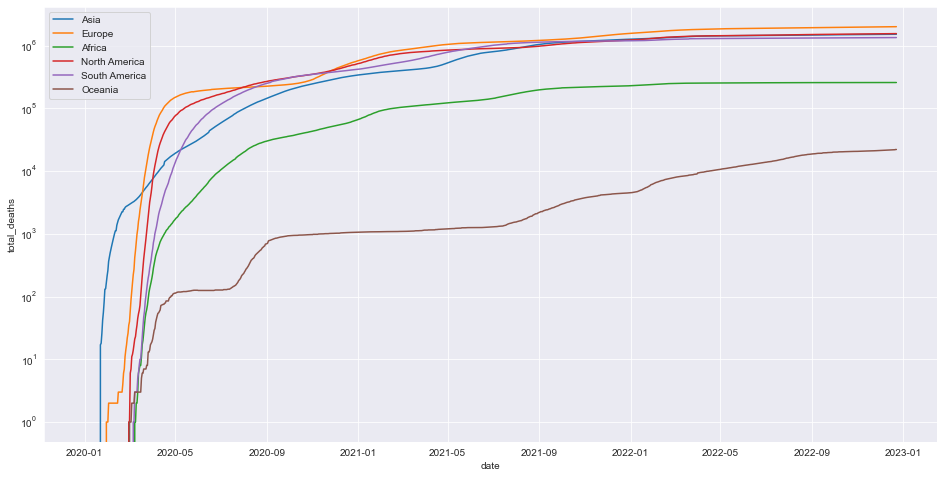

In [149]:
#Generate plot for regional deaths
plt.figure(figsize=(16, 8))
for name in continents:
    sns.lineplot(data=regional_daily_cumulative_deaths[name], x='date', y='total_deaths', label=name)
    
plt.yscale('log')

In [158]:
#Creating stacked plot of daily deaths
plot = go.Figure()

for name in continents:
    plot.add_trace(go.Scatter(
    name = name,
    x = regional_daily_cumulative_deaths[name].date,
    y =  regional_daily_cumulative_deaths[name].total_deaths,
    stackgroup='one'
   ))
    

plot.show()

### Top 20

In [174]:
def plot_hbar(df, col, n, hover_data=[]):
    fig=px.bar(df.sort_values(col).tail(n),
              x=col, y='country', color='continent',
               text=col, orientation='h', width=900, hover_data=hover_data,
               color_discrete_sequence=px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title=" ", yaxis_title=" ",
                     yaxis_categoryorder='total ascending',
                     uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [171]:
#Obtaining data for countries

total_cases_per_country=covid_data_rel.groupby(['country','continent']).agg(Total_cases=('new_cases','sum')).reset_index()
total_cases_per_country.head()



,country,continent,Total_cases
0,Afghanistan,Asia,207270.0
1,Albania,Europe,333731.0
2,Algeria,Africa,271193.0
3,Andorra,Europe,47686.0
4,Angola,Africa,104973.0


In [175]:
plot_hbar(total_cases_per_country, 'Total_cases', 20)

In [178]:
total_deaths_per_country=covid_data_rel.groupby(['country','continent']).agg(Total_deaths=('new_deaths','sum')).reset_index()
total_deaths_per_country.head()


,country,continent,Total_deaths
0,Afghanistan,Asia,7845.0
1,Albania,Europe,3595.0
2,Algeria,Africa,6881.0
3,Andorra,Europe,167.0
4,Angola,Africa,1931.0


In [179]:
plot_hbar(total_deaths_per_country, 'Total_deaths', 20)

In [181]:
country=covid_data_rel.groupby(['country','continent']).agg({'new_cases':'sum', 'new_deaths':'sum'}).reset_index()
country.head()

,country,continent,new_cases,new_deaths
0,Afghanistan,Asia,207270.0,7845.0
1,Albania,Europe,333731.0,3595.0
2,Algeria,Africa,271193.0,6881.0
3,Andorra,Europe,47686.0,167.0
4,Angola,Africa,104973.0,1931.0
